# Ejercicio k-Nearest Neighbor

## App Reviews

A continuación, vamos a realizar un ejercicio trabajando con datos de opiniones con sus datos principales del análisis de sentimiento.

### Importamos las librerías que vamos a utilizar

In [75]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Leemos nuestro archivo de entrada
(Ojo separador!)

In [76]:
df = pd.read_csv("reviews_sentiment.csv", sep=';')
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5, es decir, lo que buscaremos será predecir las estrellas en función de los datos extraídos de los textos. Podremos utilizar directamente las columnas que ya nos propocionan que se han obtenido a partir de los textos, o incluso crearte otras que puedan mejorar la predicción.

## Rápidas visualizaciones y análisis

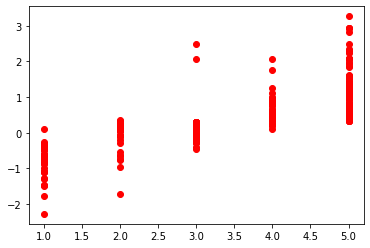

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Star Rating'], df['sentimentValue'], 'or')

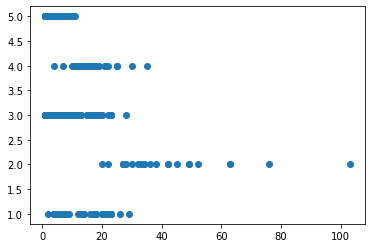

In [78]:
plt.plot(df['wordcount'], df['Star Rating'], 'o')

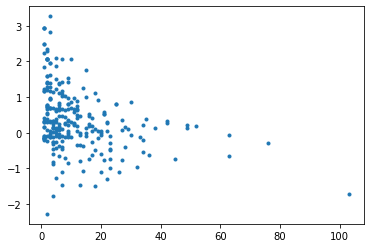

In [79]:
plt.plot(df['wordcount'], df['sentimentValue'], '.')

## Preparamos el dataset - escalado

In [85]:
df = df.fillna('')

df = df[['wordcount', 'titleSentiment', 'textSentiment', 'Star Rating', 'sentimentValue']]

X_cols = ['wordcount', 'titleSentiment', 'textSentiment', 'sentimentValue']
Y_col = 'Star Rating'

X = df[X_cols]
Y = df[Y_col]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

In [86]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_cols = X_train.columns

for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0
        
X_test = X_test[X_train.columns]

In [87]:
X_train.shape, X_test.shape

((179, 7), (78, 7))

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creamos el Modelo

In [89]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

print(f"Train: {knn.score(X_train, Y_train)}")
print(f"Test: {knn.score(X_test, Y_test)}")

Train: 0.8770949720670391
Test: 0.8717948717948718


In [90]:
X_test[:, 3]

array([-0.42146362, -0.42146362, -0.42146362, -0.42146362, -0.42146362,
        2.37268406,  2.37268406, -0.42146362,  2.37268406, -0.42146362,
        2.37268406, -0.42146362, -0.42146362, -0.42146362, -0.42146362,
       -0.42146362, -0.42146362, -0.42146362, -0.42146362, -0.42146362,
        2.37268406,  2.37268406, -0.42146362, -0.42146362, -0.42146362,
       -0.42146362, -0.42146362, -0.42146362, -0.42146362, -0.42146362,
       -0.42146362, -0.42146362, -0.42146362, -0.42146362, -0.42146362,
       -0.42146362, -0.42146362, -0.42146362, -0.42146362, -0.42146362,
       -0.42146362, -0.42146362,  2.37268406, -0.42146362, -0.42146362,
       -0.42146362, -0.42146362, -0.42146362, -0.42146362, -0.42146362,
       -0.42146362, -0.42146362, -0.42146362, -0.42146362, -0.42146362,
       -0.42146362, -0.42146362, -0.42146362, -0.42146362,  2.37268406,
       -0.42146362, -0.42146362, -0.42146362, -0.42146362, -0.42146362,
       -0.42146362, -0.42146362, -0.42146362, -0.42146362, -0.42

## Resultados obtenidos

In [91]:
knn.predict(X_test) == Y_test

46     True
245    True
182    True
59     True
105    True
       ... 
251    True
213    True
218    True
102    True
4      True
Name: Star Rating, Length: 78, dtype: bool

## ¿Cómo obtener el mejor valor de k?

In [92]:
from sklearn.neighbors import KNeighborsClassifier

# Variables para almacenar los mejores parámetros
best_k = 1
best_score = 0

for i in range(1, 101, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    sc = knn.score(X_test, Y_test)
    if sc >= best_score:
        best_score = sc
        best_k = i

In [96]:
best_score, best_k

(0.8846153846153846, 13)

# Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1 (si has tenido en cuenta más variables, quizás tengas que tratarlas como si fueran nulos)

In [100]:
X_cols

Index(['wordcount', 'sentimentValue', 'titleSentiment_',
       'titleSentiment_negative', 'titleSentiment_positive',
       'textSentiment_negative', 'textSentiment_positive'],
      dtype='object')

In [103]:
knn.predict([[5, 1, 0, 0, 0, 0, 0]])

array([3], dtype=int64)